

<br>
<font>

<div dir=ltr align=center>

<br>
<font color=900C3F size=10>
Machine Learning In Neuroimaging <br>

<br>
<font color=FF5733 size=6 dir=ltr align=center>
Session 2: Practical: Regression, GD <br>

<font color=DAF7A6 size=5>

<br>
Winter 2025

<font color=FFC300 size=6>
<br>
Fatemeh Jamshidian
    <!-- <br> -->



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Simulating Data
np.random.seed(0)
n = 50
x = np.random.normal(3, 5, size=n)
y = 2 * x + 5 + np.random.normal(0, 3, size=n)

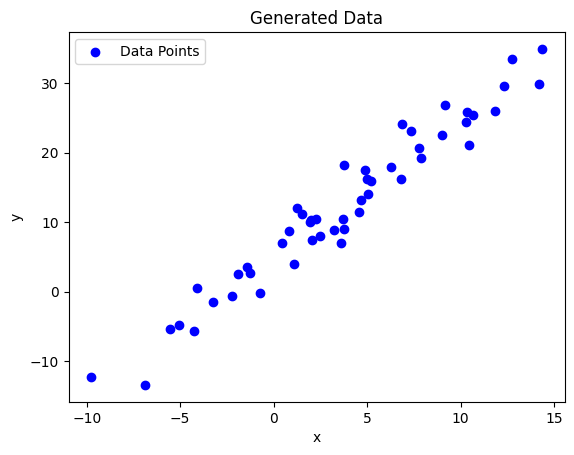

In [3]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Analytical Solution(Linear Regression)

<br>
<font>
<div dir=ltr align=center>
<img src="imgs/lreg.png" width=1000 height=200>
<br>

In [8]:
X = np.sum(x)
Y = np.sum(y)
w1 = (n * np.dot(x,y) - Y*X)/(n*np.dot(x,x)-X**2)
w0 = (Y-w1*X)/n
w1, w0 = round(w1, 2), round(w0, 2)
print(f"y_predict = {w1} x + {w0}")

y_predict = 1.97 x + 5.04


In [10]:
print(f"W0  = {w0}")
print(f"W1  = {w1}")

W0  = 5.04
W1  = 1.97


In [12]:
y_pred1 = w1 * x + w0

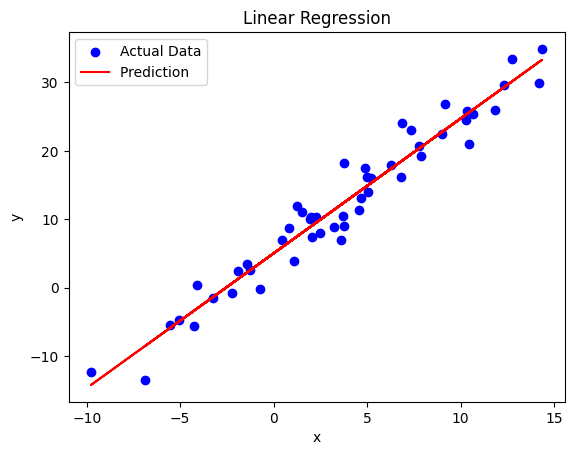

In [14]:
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred1, color='red', label='Prediction ')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## loss function of y_predic1 ====> use $MSE$



#### The Mean Square Error (MSE).

${MSE} =  { \sum_{i=1}^n (y^(i^) -h_w(x^(i^)))^2  \above{1pt}N} $

Here: 


$h_w(x) =$ y_predict1 $= 1.97 x + 5.04 $

if 

$
W0  = 5.04$

$
W1  = 1.97
$


then the MSE would be : 


In [19]:
loss = np.sum((y- y_pred1 ) ** 2) / len(y)
loss

6.742880666321133

?


can we find w0 & w1 when the loss function would stand at the minimum value?

In [21]:
def SSE_loss(w0, w1, x, y):
    pred = w0 + w1 * x
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

# Generate w0 and w1 values
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-5,5, 100)

# Calculate MSE loss for each (w0, w1)
# Log-scale is used only for better visualization

Z = np.zeros((len(w0_vals),len(w1_vals)))
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        Z[i, j] = np.log(SSE_loss(w0_vals[i], w1_vals[j], x, y))

Z

array([[8.07581392, 8.0523071 , 8.02853634, ..., 5.63656118, 5.68904885,
        5.74189423],
       [8.07068003, 8.04709914, 8.0232523 , ..., 5.63009313, 5.68342679,
        5.73704969],
       [8.06554529, 8.04189018, 8.01796708, ..., 5.62387774, 5.67805214,
        5.73244599],
       ...,
       [7.60014769, 7.56963841, 7.53866182, ..., 6.18440395, 6.24396904,
        6.30188344],
       [7.59586059, 7.5652965 , 7.53426377, ..., 6.19691829, 6.25605399,
        6.31356604],
       [7.59159622, 7.56097813, 7.52989011, ..., 6.20944207, 6.26814939,
        6.3252599 ]])

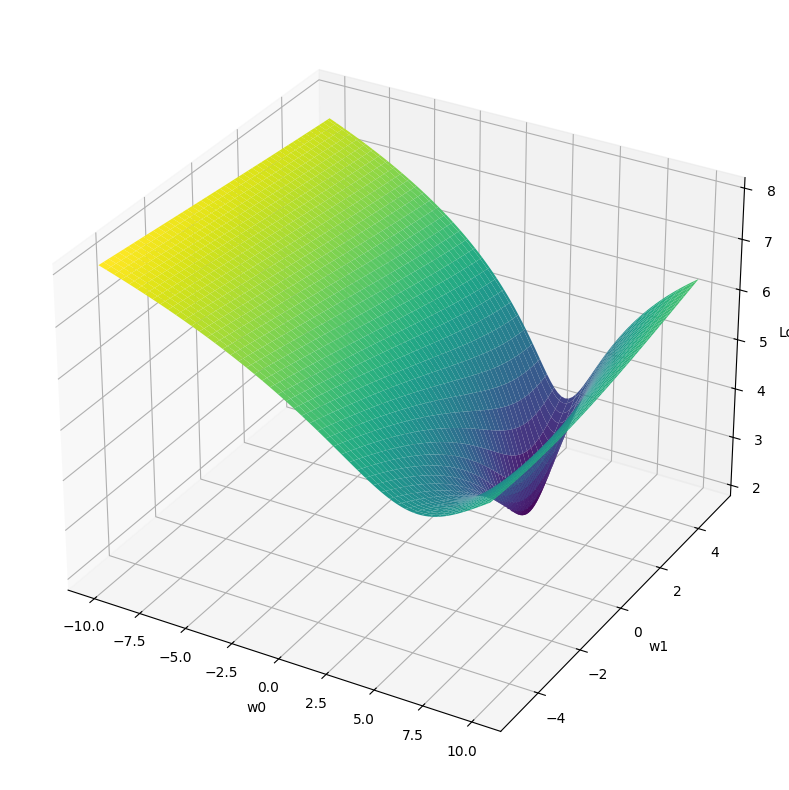

In [23]:
# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss')
plt.show()


Batch GD: w0=5.02, w1=1.97, Error=6.743
0.00013307937157663885


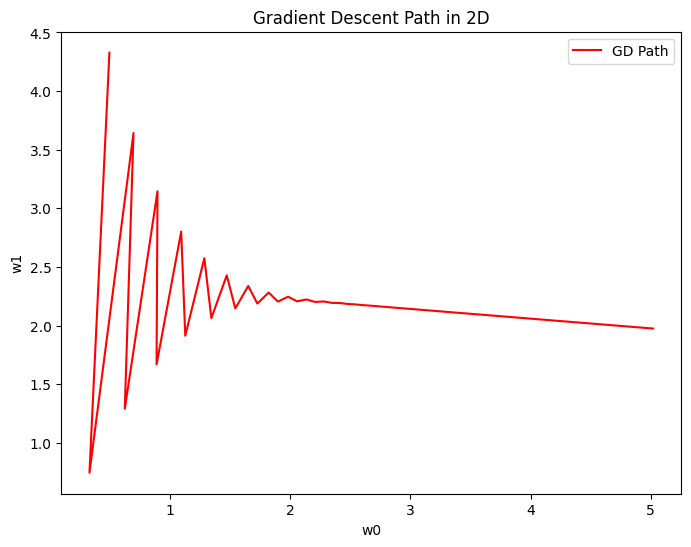

In [33]:
# Gradient descent func
def gradient(w0, w1, x, y):
    yhat = w0 + w1 * x # yhat is y_predict
    error = (y-yhat)**2 # squerd error of (w0, w1)
    dw0 = - 2 * (y - yhat)
    dw1 = - 2 * x * (y - yhat)
    return dw0, dw1, error


w0, w1 = 0, 0
alpha = 0.02
w0l, w1l, errl = [], [], []

for epoch in range(1000):
    Gw0, Gw1, Error = 0, 0, 0
    for i in range(n):
        gw0, gw1, err = gradient(w0, w1, x[i], y[i])
        Gw0, Gw1, Error = Gw0 + gw0, Gw1 + gw1, Error + err
    Gw0, Gw1, Error = Gw0 / n, Gw1 / n, Error / n
    w0, w1 = w0 - alpha * Gw0, w1 - alpha * Gw1
    alpha = 0.995 * alpha  # Decay learning rate
    w0l.append(w0)
    w1l.append(w1)
    errl.append(Error)


print(f"Batch GD: w0={round(w0, 2)}, w1={round(w1, 2)}, Error={round(Error, 3)}")
print(alpha)

plt.figure(figsize=(8, 6))
plt.plot(w0l, w1l, color='r', label='GD Path')
plt.title("Gradient Descent Path in 2D")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend()
plt.show()

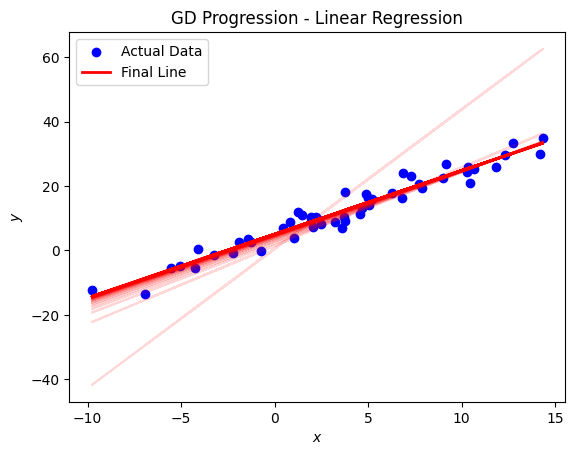

In [34]:
plt.scatter(x, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(np.array([w0l,w1l]).T[::1000 // 100]):
    alpha = 0.15 + 0.85*(idx) / 100 
    yhat = w[0] + w[1] * x
    plt.plot(x, yhat, color='red', alpha=alpha)

y_final = w0l[-1] + w1l[-1] * x
plt.plot(x ,y_final, color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

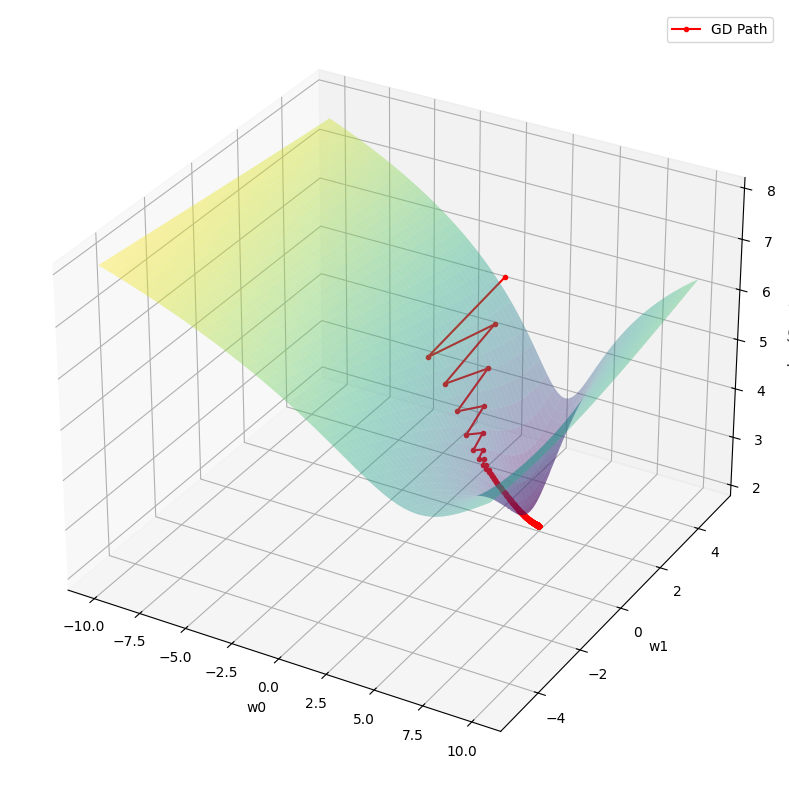

In [37]:

# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis', alpha=0.4)

cost_history_log = np.log(np.array(errl))

# Plot the path of gradient descent in 3D
ax.plot(w0l, w1l, cost_history_log, marker='o', color='r', label='GD Path', markersize=3)
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("Log(Cost)")
plt.legend()
plt.show()



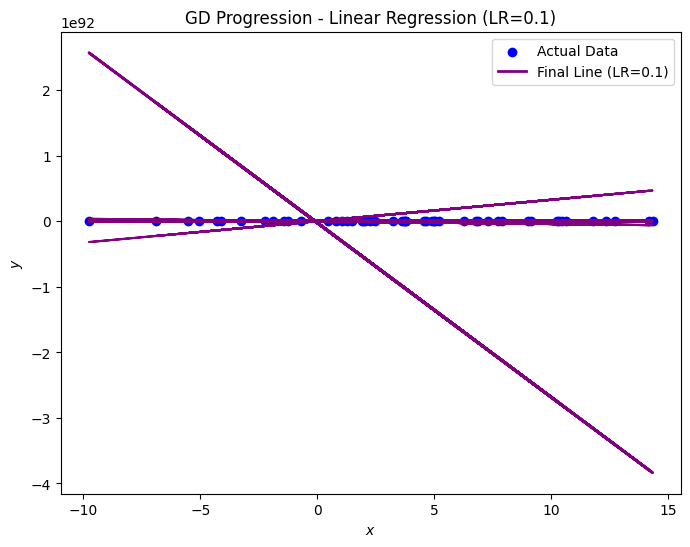

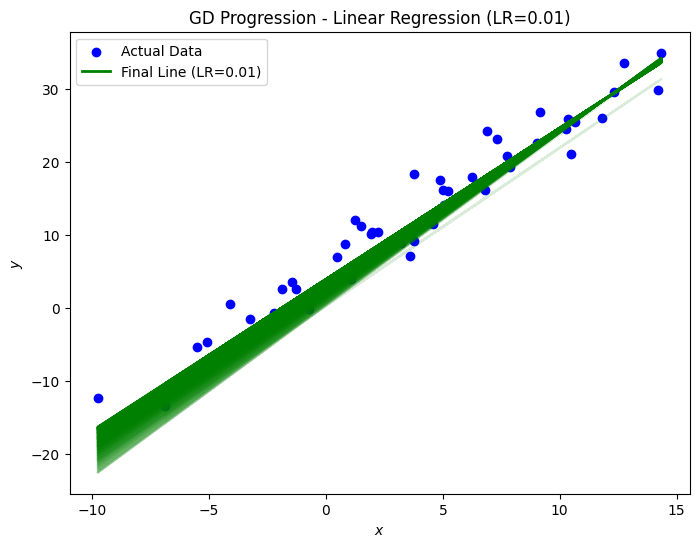

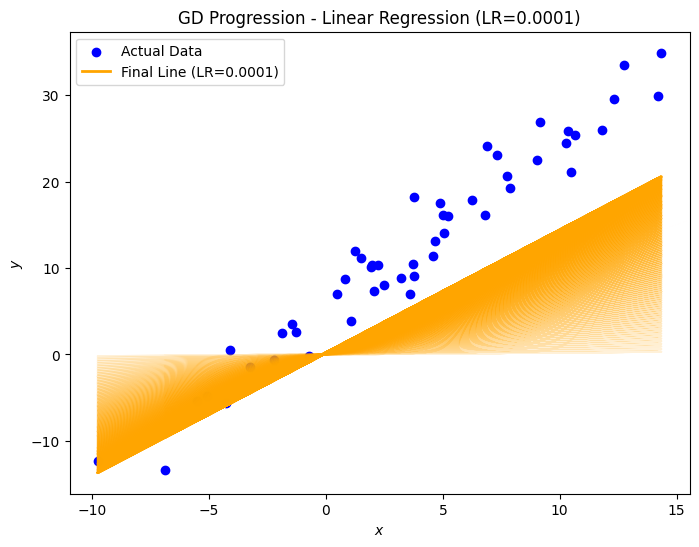

In [41]:

learning_rates = [ 0.1, 0.01, 0.0001]
colors = ['purple', 'green', 'orange']
cost_histories = []

# over learning rates
for lr, color in zip(learning_rates, colors):
    w0, w1 = 0, 0  
    w0l, w1l, errl = [], [], []

    #  gradient descent
    for epoch in range(100):
        Gw0, Gw1, Error = 0, 0, 0
        for i in range(n):
            gw0, gw1, err = gradient(w0, w1, x[i], y[i])
            Gw0, Gw1, Error = Gw0 + gw0, Gw1 + gw1, Error + err
        Gw0, Gw1, Error = Gw0 / n, Gw1 / n, Error / n
        w0, w1 = w0 - lr * Gw0, w1 - lr * Gw1
        w0l.append(w0)
        w1l.append(w1)
        errl.append(Error)
    cost_histories.append(errl)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Actual Data')

    for idx, w in enumerate(np.array([w0l, w1l]).T[::100 // 100]):
        alpha = 0.15 + 0.85 * idx / 100
        yhat = w[0] + w[1] * x
        plt.plot(x, yhat, color=color, alpha=alpha)

    y_final = w0l[-1] + w1l[-1] * x
    plt.plot(x, y_final, color=color, lw=2, label=f'Final Line (LR={lr})')
    plt.title(f"GD Progression - Linear Regression (LR={lr})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()


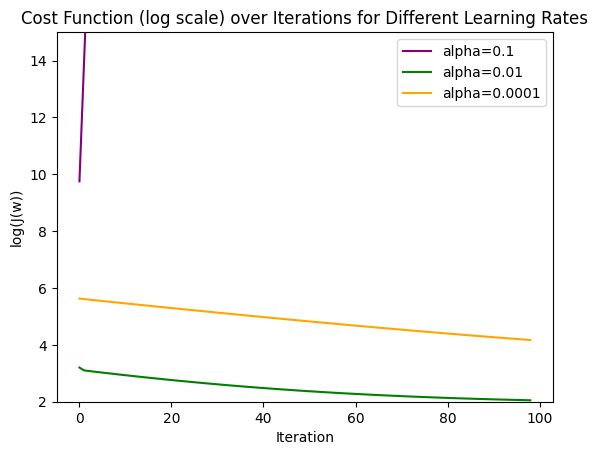

In [43]:
plt.title("Cost Function (log scale) over Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("log(J(w))")
for idx in range(len(cost_histories)):
  plt.plot(np.log(cost_histories[idx][1:]), label=f'alpha={learning_rates[idx]}', color=colors[idx])
plt.ylim(bottom=2, top=15)
plt.legend()
plt.show()

### if D>1

$ W = (X^TX)^{-1}  {X^T y} $

In [48]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]

    return X_poly

In [52]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(x, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")

Parameters (w) for Degree 5: [ 5.25736712e+00  2.04104594e+00 -3.00730819e-02  7.29665489e-04
  3.49111406e-04 -2.07678002e-05]


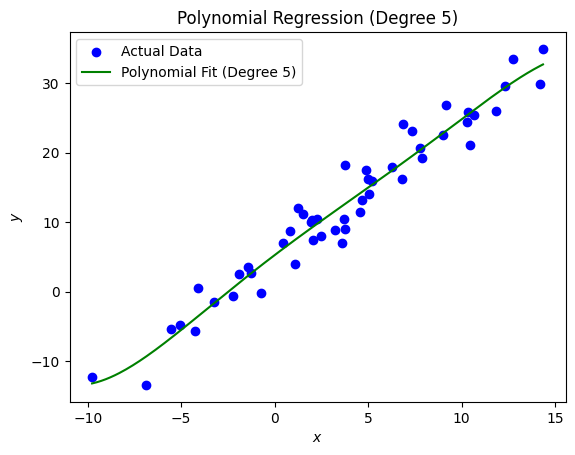

In [54]:
X_fit = np.linspace(x.min(), x.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = yhat = X' * w

plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
